## Time Series Analysis and Forecasting
### Assignment 01

Icecream sales is highly dependent on season. Given below is the sales (in $amount) of monthly sales of icecream for a brand.<br>
a) Split the data as train and test(90-10)<br>
b) Fit an apropriate smoothing method to the train data<br>
c) Forecast the sales for the test data<br>
d) Calulate the MAPE in the test period.<br>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Read the icecream sales dataset
icecream_df = pd.read_csv("icecream_sales.csv", parse_dates=True)

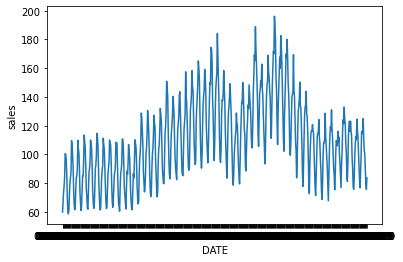

In [3]:
sns.lineplot(x='DATE', y='sales', data=icecream_df);

In [4]:
icecream_df.head()

,DATE,sales
0,01-01-1972,59.9622
1,01-02-1972,67.0605
2,01-03-1972,74.2350
3,01-04-1972,78.1120
4,01-05-1972,84.7636


### We set the date as the index and also resample the data to make it a monthly data set. 

In [5]:
icecream_df.dtypes

DATE      object
sales    float64
dtype: object

In [6]:
icecream_df.head(24)

,DATE,sales
0,01-01-1972,59.9622
1,01-02-1972,67.0605
2,01-03-1972,74.2350
3,01-04-1972,78.1120
4,01-05-1972,84.7636
5,01-06-1972,100.5960
6,01-07-1972,100.1263
7,01-08-1972,96.3607
8,01-09-1972,85.8007
9,01-10-1972,70.3934


#### Thus it appears that the format is dd-mm-yyyy. Hence while converting into datetime, we would consider the same. 

In [7]:
#Converting the 'DATE' column to datetime format

icecream_df['DATE'] = pd.to_datetime(icecream_df['DATE'], dayfirst=True)

icecream_df.dtypes

DATE     datetime64[ns]
sales           float64
dtype: object

In [8]:
icecream_df.head(24)

,DATE,sales
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
5,1972-06-01,100.5960
6,1972-07-01,100.1263
7,1972-08-01,96.3607
8,1972-09-01,85.8007
9,1972-10-01,70.3934


In [9]:
icecream_df = icecream_df.set_index('DATE')

icecream_df.head()

,sales
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [10]:
icecream_df_ms = icecream_df.asfreq('MS')
icecream_df_ms.head()

,sales
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [11]:
icecream_df.tail()


,sales
DATE,
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


#### Thus the data is from Jan 1972 till Jan 2020, i.e. 48 years and 1 month or 577 months. A 90-10 train-test split would mean that the 90% point falls at 519.3 months or 43.275 years. To round it off, we consider the first 43 years as train data and the rest as test data. 

#### We also add a Naive forecast column before splitting into train and test

In [12]:
icecream_df['naive'] = icecream_df.sales.shift(12)

icecream_df.tail(13)

,sales,naive
DATE,,
2019-01-01,86.9988,83.4343
2019-02-01,98.1116,99.4899
2019-03-01,116.1718,107.3152
2019-04-01,114.9703,112.4309
2019-05-01,114.5613,110.3544
2019-06-01,124.9605,124.5841
2019-07-01,110.2632,117.2215
2019-08-01,102.6085,112.6779
2019-09-01,100.1741,103.3118


In [13]:
train_ts = icecream_df["1972-01-01" : "2014-12-01"]
test_ts = icecream_df["2015-01-01": ]

In [14]:
train_ts.shape

(516, 2)

In [15]:
test_ts.shape

(61, 2)

In [16]:
test_ts.tail()

,sales,naive
DATE,,
2019-09-01,100.1741,103.3118
2019-10-01,90.1684,92.1321
2019-11-01,79.7223,82.4347
2019-12-01,75.7094,76.7608
2020-01-01,83.6290,86.9988


<AxesSubplot:xlabel='DATE'>

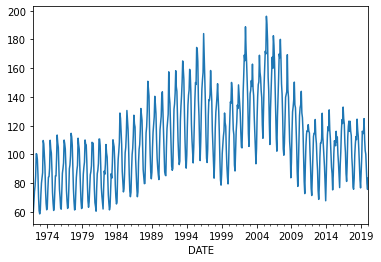

In [17]:
icecream_df.sales.plot()

#### In order to choose the right smoothing method, we would decompose the data to analyse the trend and seasonality

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

import matplotlib as mpl
mpl.rc("figure", figsize=(10,8))
import matplotlib.pyplot as plt
import seaborn as sns

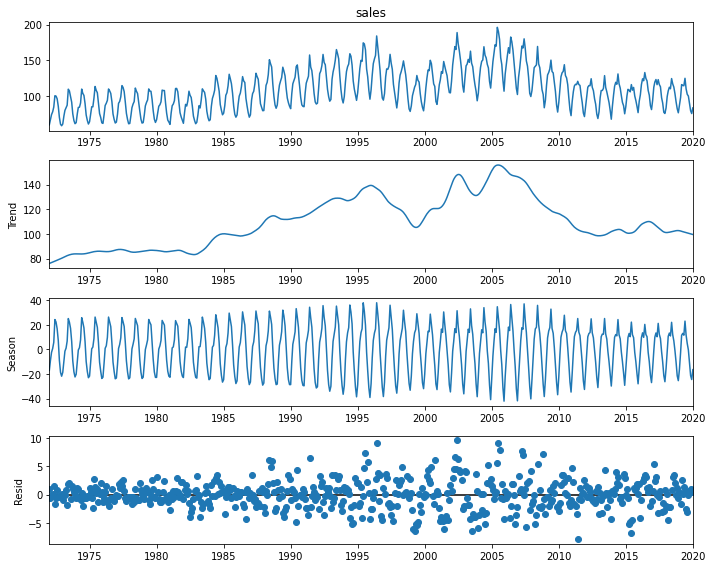

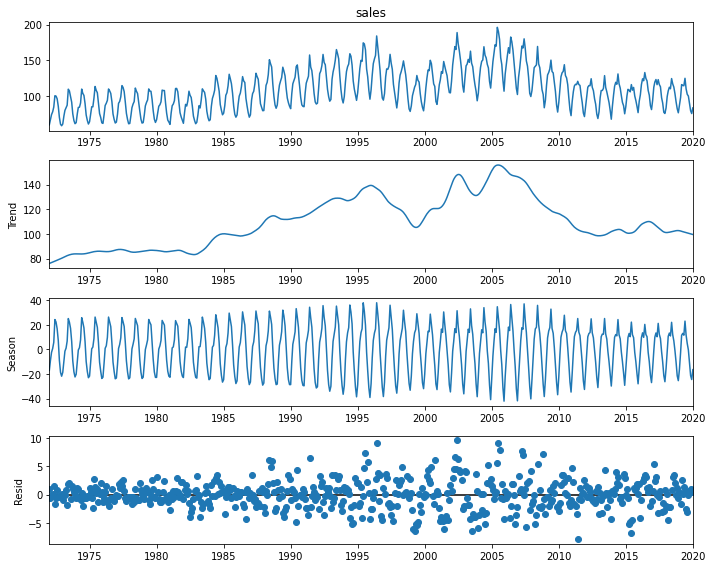

In [19]:
stl_icecream = STL(icecream_df.sales, period = 12).fit()

stl_icecream.plot()


### Thus we can observe that both trend and seasonality are changing, hence we can apply Holt-Winter's method

### We can also check again by training all the three exponential smoothing methods.

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing          # Simple 
from statsmodels.tsa.holtwinters import Holt                        # Holt's Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing        # Holt Winter's Exponential Smoothing

In [21]:
SE_fit = SimpleExpSmoothing(icecream_df.sales).fit() 
Holt_fit = Holt(icecream_df.sales).fit() 
HoltWinter_fit = ExponentialSmoothing(icecream_df.sales).fit()

C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### We shift the fitted values by -1. 

In [22]:
icecream_df['ses'] = SE_fit.fittedvalues.shift(-1)
icecream_df['holts'] = Holt_fit.fittedvalues.shift(-1)
icecream_df['holt_winter'] = HoltWinter_fit.fittedvalues.shift(-1)


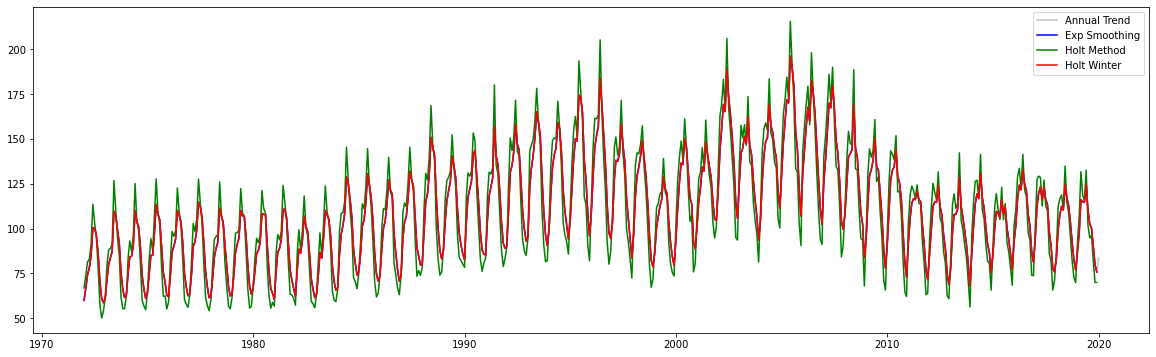

In [23]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(icecream_df['sales'], color='.5', alpha=.5, label='Annual Trend')
ax.plot(icecream_df['ses'], color='b', label='Exp Smoothing')
ax.plot(icecream_df['holts'], color='g', label='Holt Method')
ax.plot(icecream_df['holt_winter'], color='r', label='Holt Winter')
ax.legend()

#### We zoom in more closely by selecting a smaller window

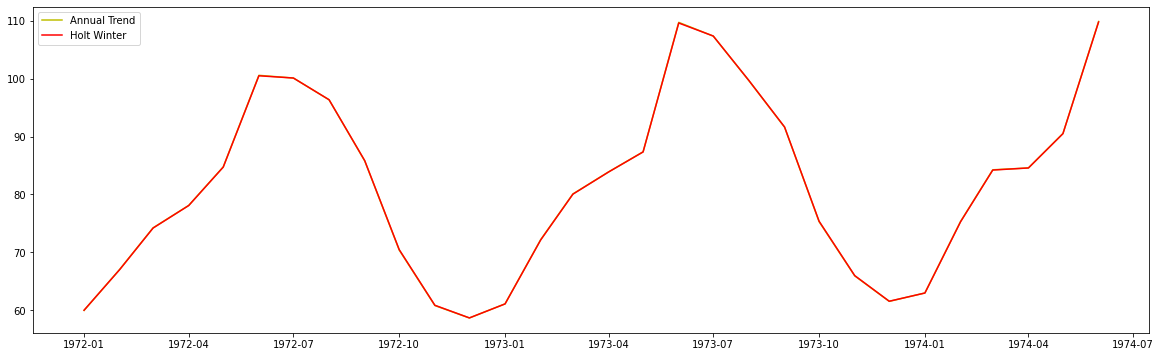

In [24]:
ic = icecream_df.iloc[0:30]
fig2, ax2 = plt.subplots(figsize=(20,6))

ax2.plot(ic['sales'], color='y', label='Annual Trend')
#ax2.plot(ic['ses'], color='b', label='Exp Smoothing')
#ax2.plot(ic['holts'], color='g', label='Holt Method')
ax2.plot(ic['holt_winter'], color='r', label='Holt Winter')
ax2.legend()

### Based on the above analysis, the simple Exponential and the Holt Winter's method's forecasts are matching the values. Still, based on the earlier analysis of the Decomposition, we would proceed with the Holt-Winter's method. (The Exponential smoothing and the annual trend are overlapping with the Holt-Winter's line)

In [25]:
icecream_df.index.freq = 'MS'

ts_model_hw = ExponentialSmoothing(train_ts.sales,
                                  trend = 'multiplicative',
                                  seasonal = 'multiplicative',
                                  seasonal_periods = 12).fit()


C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
ts_model_output = ts_model_hw.forecast(61).rename('HW Forecast')

In [27]:
icecream_df.index.freq = 'MS'

ts_model_ses = SimpleExpSmoothing(train_ts.sales).fit()


C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='DATE'>

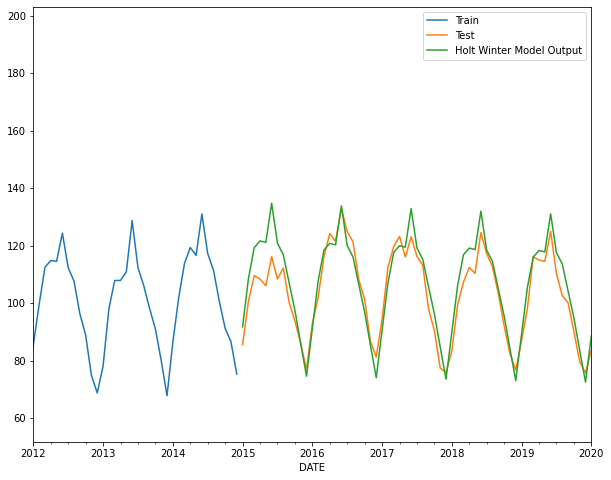

In [28]:


train_ts.sales.plot(legend = True, label = 'Train')
test_ts.sales.plot(legend = True, label = 'Test')
ts_model_output.plot(legend = True, label='Holt Winter Model Output', xlim = ['2012-01-01','2020-01-01'])


#### The above plot displays the comparision between the model output and the test data. We can proceed towards measuring the error

In [29]:
import math

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [30]:
mse = mean_squared_error( test_ts.sales, ts_model_output)
rmse = math.sqrt(mse)

print('The RMSE for the model is', round(rmse,3))

The RMSE for the model is 6.361


In [31]:
MAPE = mean_absolute_percentage_error(  test_ts.sales, ts_model_output)

print('The MAPE for the model is', round(MAPE,3))

The MAPE for the model is 0.051


In [32]:
naive_fc = test_ts.naive

MAPE_naive = mean_absolute_percentage_error(test_ts.sales, naive_fc)

print('The MAPE for the Naive Forecast is', round(MAPE_naive,3))

The MAPE for the Naive Forecast is 0.057


### The Model performs marginally better than the Naive Forecast ( 5.1% vs 5.7%)